In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import seaborn as sns
import squarify
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'Poppins'
sns.set_theme(style='ticks')
palette = 'dark:b_r'

In [121]:
df = pd.read_csv('qaran_jobs_scraped_data_cleaned.csv')

In [122]:
df.head()

,job_titles_cleaned,company,job_category,job_type,location,posted,extracted_deadline,education_level,Education_Field,Experience,languages_required,soft_skills,technical_skills,description,url
0,the Financial Inclusion Specialist,Sadar Institute,Finance,Full-Time,Somalia,2024-12-29,2025-01-09,Bachelor or Master,Business administration,10.0,"Somali, English","Communication, Facilitation skills, Initiative...","Capacity building, Food security, Gis, Microso...",Re-advertisement for the Financial Inclusion S...,https://qaranjobs.com/job/re-advertisement-for...
1,Market and Agribusiness Development Specialist,Sadar Institute,Marketing,Full-Time,Somalia,2024-12-29,2025-01-09,Bachelor or Master,Business administration,10.0,"Somali, English","Communication, Facilitation skills, Initiative...","Capacity building, Food security, Market analy...",Re-advertisement for Market and Agribusiness D...,https://qaranjobs.com/job/re-advertisement-for...
2,Livestock Sector Specialist,Sadar Institute,Marketing,Full-Time,Somalia,2024-12-29,2025-01-09,Bachelor or Master,Medicine,10.0,"Somali, English","Communication, Facilitation skills, Initiative...","Capacity building, Food security, Microsoft ex...",Re-advertisement for Livestock Sector Speciali...,https://qaranjobs.com/job/re-advertisement-for...
3,Tax Collector,SSC-Khaatumo,Information Technology,Full-Time,"Buuhoodle, SSC-Khaatumo",2024-12-24,2025-01-04,Bachelor,Business administration,2.0,Not Specified,"Communication, Interpersonal communication",Aws,Tax Collectors (12 Positions) – Buuhoodle SSC-...,https://qaranjobs.com/job/tax-collectors-12-po...
4,Tax Collector,SSC-Khaatumo,Information Technology,Full-Time,"Las ’Anod, SSC-Khaatumo",2024-12-24,2025-01-04,Bachelor,Business administration,2.0,Not Specified,"Communication, Interpersonal communication",Aws,Tax Collectors (16 Positions) – Las ’Anod SSC-...,https://qaranjobs.com/job/tax-collectors-16-po...


In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7647 entries, 0 to 8076
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   job_titles_cleaned  7647 non-null   object        
 1   company             7647 non-null   object        
 2   job_category        7647 non-null   object        
 3   job_type            7647 non-null   object        
 4   location            7647 non-null   object        
 5   posted              7647 non-null   datetime64[ns]
 6   extracted_deadline  7647 non-null   object        
 7   education_level     7647 non-null   object        
 8   Education_Field     7647 non-null   object        
 9   Experience          7647 non-null   object        
 10  languages_required  7647 non-null   object        
 11  soft_skills         7647 non-null   object        
 12  technical_skills    7647 non-null   object        
 13  description         7647 non-null   object        
 1

In [124]:
df.dropna(inplace=True)

In [125]:
df.isna().sum()

job_titles_cleaned    0
company               0
job_category          0
job_type              0
location              0
posted                0
extracted_deadline    0
education_level       0
Education_Field       0
Experience            0
languages_required    0
soft_skills           0
technical_skills      0
description           0
url                   0
dtype: int64

In [126]:
# Convert 'posted' column to datetime format
df['posted'] = pd.to_datetime(df['posted'], errors='coerce')

# Extracting required date components
df['posted_month_short'] = df['posted'].dt.strftime('%b')  # Shortened month name
df['posted_day_short'] = df['posted'].dt.strftime('%a')    # Shortened day name
df['posted_day'] = df['posted'].dt.day                     # Day as number
df['posted_month'] = df['posted'].dt.month                 # Month as number
df['posted_year'] = df['posted'].dt.year                   # Year as number

In [127]:
df.head()

,job_titles_cleaned,company,job_category,job_type,location,posted,extracted_deadline,education_level,Education_Field,Experience,languages_required,soft_skills,technical_skills,description,url,posted_month_short,posted_day_short,posted_day,posted_month,posted_year
0,the Financial Inclusion Specialist,Sadar Institute,Finance,Full-Time,Somalia,2024-12-29,2025-01-09,Bachelor or Master,Business administration,10.0,"Somali, English","Communication, Facilitation skills, Initiative...","Capacity building, Food security, Gis, Microso...",Re-advertisement for the Financial Inclusion S...,https://qaranjobs.com/job/re-advertisement-for...,Dec,Sun,29,12,2024
1,Market and Agribusiness Development Specialist,Sadar Institute,Marketing,Full-Time,Somalia,2024-12-29,2025-01-09,Bachelor or Master,Business administration,10.0,"Somali, English","Communication, Facilitation skills, Initiative...","Capacity building, Food security, Market analy...",Re-advertisement for Market and Agribusiness D...,https://qaranjobs.com/job/re-advertisement-for...,Dec,Sun,29,12,2024
2,Livestock Sector Specialist,Sadar Institute,Marketing,Full-Time,Somalia,2024-12-29,2025-01-09,Bachelor or Master,Medicine,10.0,"Somali, English","Communication, Facilitation skills, Initiative...","Capacity building, Food security, Microsoft ex...",Re-advertisement for Livestock Sector Speciali...,https://qaranjobs.com/job/re-advertisement-for...,Dec,Sun,29,12,2024
3,Tax Collector,SSC-Khaatumo,Information Technology,Full-Time,"Buuhoodle, SSC-Khaatumo",2024-12-24,2025-01-04,Bachelor,Business administration,2.0,Not Specified,"Communication, Interpersonal communication",Aws,Tax Collectors (12 Positions) – Buuhoodle SSC-...,https://qaranjobs.com/job/tax-collectors-12-po...,Dec,Tue,24,12,2024
4,Tax Collector,SSC-Khaatumo,Information Technology,Full-Time,"Las ’Anod, SSC-Khaatumo",2024-12-24,2025-01-04,Bachelor,Business administration,2.0,Not Specified,"Communication, Interpersonal communication",Aws,Tax Collectors (16 Positions) – Las ’Anod SSC-...,https://qaranjobs.com/job/tax-collectors-16-po...,Dec,Tue,24,12,2024


### **1. Job Market Trends & Demand**

- What are the most in-demand **job categories**?

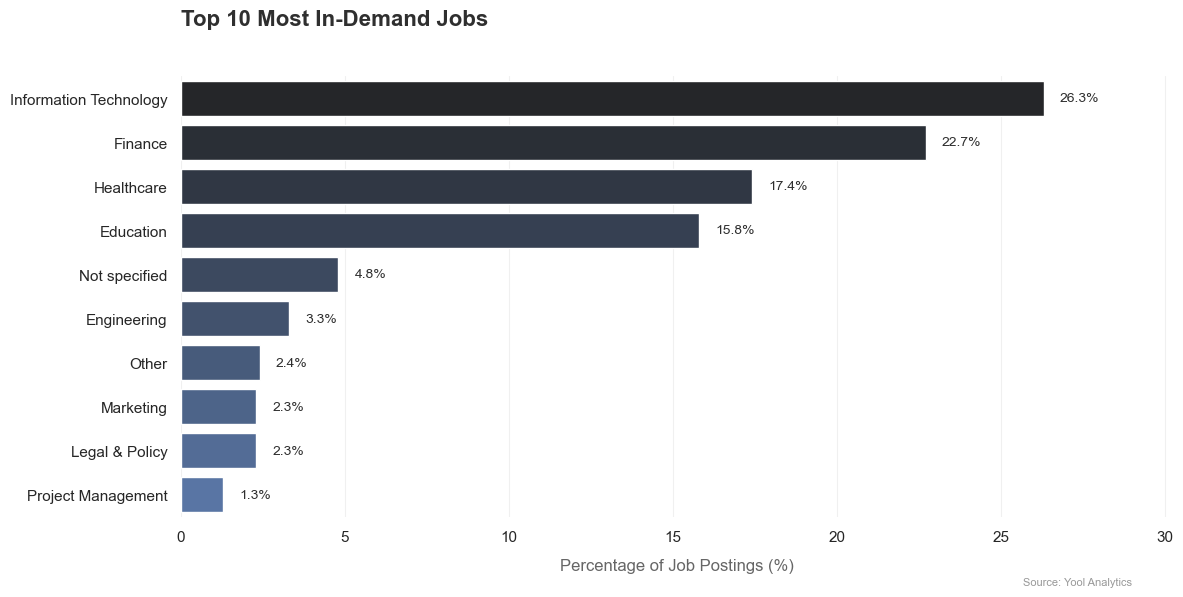

In [165]:
# Filter out 'Not Specified' values
df_filtered = df[(df['job_category'] != 'Not Specified') & (df['job_type'] != 'Not Specified')]

# Calculate percentages
total_jobs = len(df_filtered)
job_category_percents = (df_filtered['job_category'].value_counts().head(10) / total_jobs * 100).round(1)

# Set up visual styling
plt.rcParams['font.family'] = 'Poppins'
sns.set_theme(style='ticks')
palette = sns.color_palette("dark:b", n_colors=10)  # Removed "_r" to reverse gradient direction

# ... [rest of the code remains identical until palette usage] ...

# Create horizontal bar plot with correct gradient
bar_plot = sns.barplot(x=job_category_percents.values, 
                       y=job_category_percents.index,
                       palette=palette,  # Now dark-to-light from top-to-bottom
                       ax=ax)

# Create figure with title spacing
fig, ax = plt.subplots(figsize=(12, 6))
plt.subplots_adjust(top=0.85)  # Add space above title

# Create horizontal bar plot with hue
bar_plot = sns.barplot(x=job_category_percents.values, 
                       y=job_category_percents.index,
                       palette=palette,
                       ax=ax)

# Clean title formatting
plt.title('Top 10 Most In-Demand Jobs\n', 
          loc='left', 
          fontsize=16, 
          fontweight='semibold', 
          color='#2F2F2F',
          pad=20)  # Add title padding

# Percentage data labels
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 0.5,  # Tight spacing
            p.get_y() + p.get_height()/2,
            f'{width:.1f}%',  # Percentage format
            ha='left', 
            va='center',
            fontsize=10,
            color='#2F2F2F')

# Axis cleanup
ax.set_xlabel('Percentage of Job Postings (%)', 
              labelpad=10, 
              fontsize=12, 
              color='#666666')
ax.set_ylabel('')
ax.set_xlim(0, job_category_percents.max() * 1.15)  # Dynamic x-axis limit

# Remove clutter
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
sns.despine(left=True, bottom=True)
ax.grid(False)

# Light gridlines
ax.xaxis.grid(True, 
              color='#F0F0F0', 
              linestyle='-', 
              linewidth=0.8)

# Source annotation
fig.text(0.95, 0.01, 'Source: Yool Analytics', 
         ha='right', 
         color='#999999',
         fontsize=8)

plt.tight_layout()
plt.show()

- What are the **top hiring companies**?

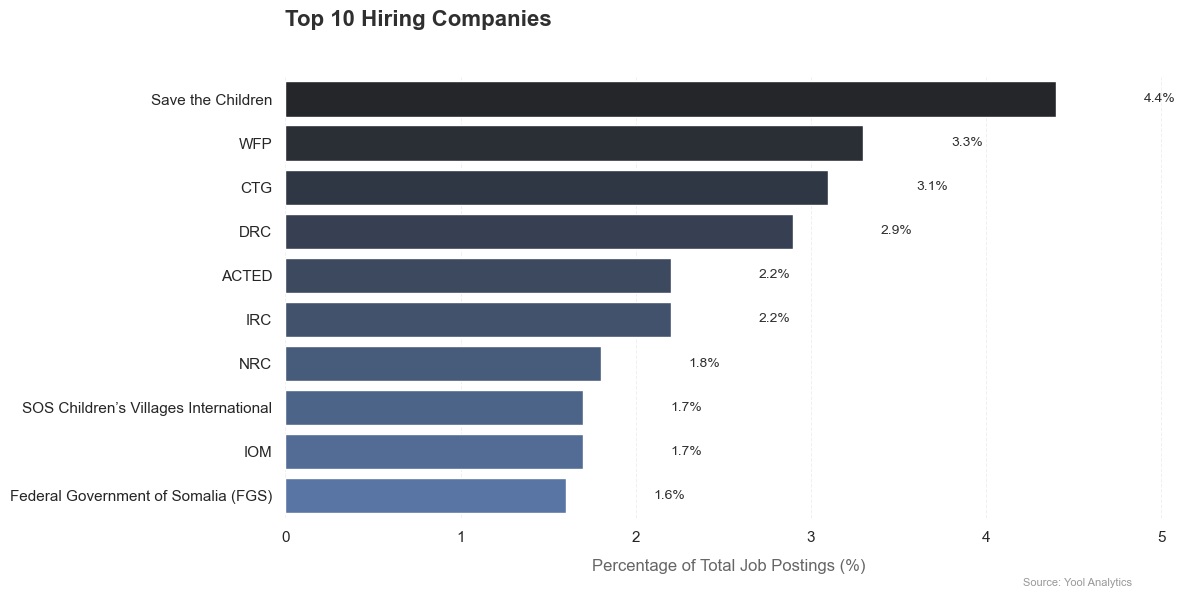

In [163]:
top_companies = df_filtered['company'].value_counts().head(10)
# Calculate percentages
total_jobs = len(df_filtered)
top_companies_percent = (top_companies / total_jobs * 100).round(1)

# Reverse color palette for gradient
palette = sns.color_palette("dark:b", n_colors=10)  # Removed "_r" to reverse gradient

# Create figure with spacing
fig, ax = plt.subplots(figsize=(12, 6))
plt.subplots_adjust(top=0.85)

# Create horizontal bar plot with reversed gradient
sns.barplot(x=top_companies_percent.values, 
            y=top_companies_percent.index,
            palette=palette,
            ax=ax)

# Title formatting
plt.title('Top 10 Hiring Companies\n', 
          loc='left', 
          fontsize=16, 
          fontweight='semibold', 
          color='#2F2F2F',
          pad=20)

# Percentage labels
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 0.5,  # Reduced offset for percentages
            p.get_y() + p.get_height()/2,
            f'{width:.1f}%',  # Added percentage format
            ha='left', 
            va='center',
            fontsize=10,
            color='#2F2F2F')

# Axis cleanup
ax.set_xlabel('Percentage of Total Job Postings (%)', 
              labelpad=10, 
              fontsize=12, 
              color='#666666')
ax.set_ylabel('')
ax.set_xlim(0, top_companies_percent.max() * 1.15)  # Scale for percentages

# Remove clutter
sns.despine(left=True, bottom=True)
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Light gridlines
ax.xaxis.grid(True, 
              color='#F0F0F0', 
              linestyle='--', 
              linewidth=0.7)

# Source annotation
fig.text(0.95, 0.01, 'Source: Yool Analytics', 
         ha='right', 
         color='#999999',
         fontsize=8)

plt.tight_layout()
plt.show()

### **2. Location-Based Job Market Insights**

- Which **cities or regions** have the highest job availability?

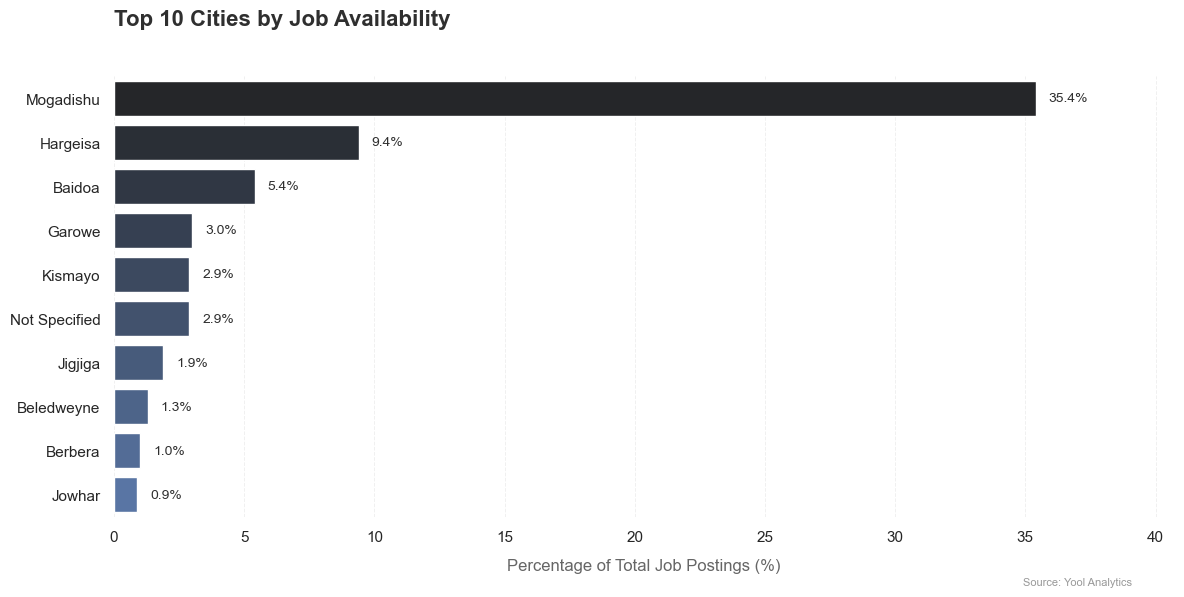

In [162]:
# Function to remove "Somalia" and "Somaliland" from location names
def clean_location(location):
    return location.replace("Somalia", "").replace("Somaliland", "").replace("Somali Regional State of Ethiopia", "").replace("Unknown Location", "Not Specified").strip(", ")

# Apply function to clean location names
df_location_filtered['location_cleaned'] = df_location_filtered['location'].apply(clean_location)

# Count job postings by cleaned location
location_counts_cleaned = df_location_filtered['location_cleaned'].value_counts().head(10)
# Calculate percentages
total_location_jobs = len(df_location_filtered)
location_percents_cleaned = (location_counts_cleaned / total_location_jobs * 100).round(1)

# Set up styling
plt.rcParams['font.family'] = 'Poppins'
sns.set_theme(style='ticks')
palette = sns.color_palette("dark:b", n_colors=10)  # Darkest at top

# Create figure
fig, ax = plt.subplots(figsize=(12, 6))
plt.subplots_adjust(top=0.85)

# Create horizontal bar plot
sns.barplot(x=location_percents_cleaned.values, 
            y=location_percents_cleaned.index,
            palette=palette,
            ax=ax)

# Title formatting
plt.title('Top 10 Cities by Job Availability\n', 
          loc='left', 
          fontsize=16, 
          fontweight='semibold', 
          color='#2F2F2F',
          pad=20)

# Percentage labels
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 0.5,  # Tight spacing
            p.get_y() + p.get_height()/2,
            f'{width:.1f}%',
            ha='left', 
            va='center',
            fontsize=10,
            color='#2F2F2F')

# Axis cleanup
ax.set_xlabel('Percentage of Total Job Postings (%)', 
              labelpad=10, 
              fontsize=12, 
              color='#666666')
ax.set_ylabel('')
ax.set_xlim(0, location_percents_cleaned.max() * 1.15)

# Remove clutter
sns.despine(left=True, bottom=True)
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Light gridlines
ax.xaxis.grid(True, 
              color='#F0F0F0', 
              linestyle='--', 
              linewidth=0.7)

# Source annotation
fig.text(0.95, 0.01, 'Source: Yool Analytics', 
         ha='right', 
         color='#999999',
         fontsize=8)

plt.tight_layout()
plt.show()

### **3. Skills & Qualifications Employers Seek**

- What are the **most commonly required technical skills**?

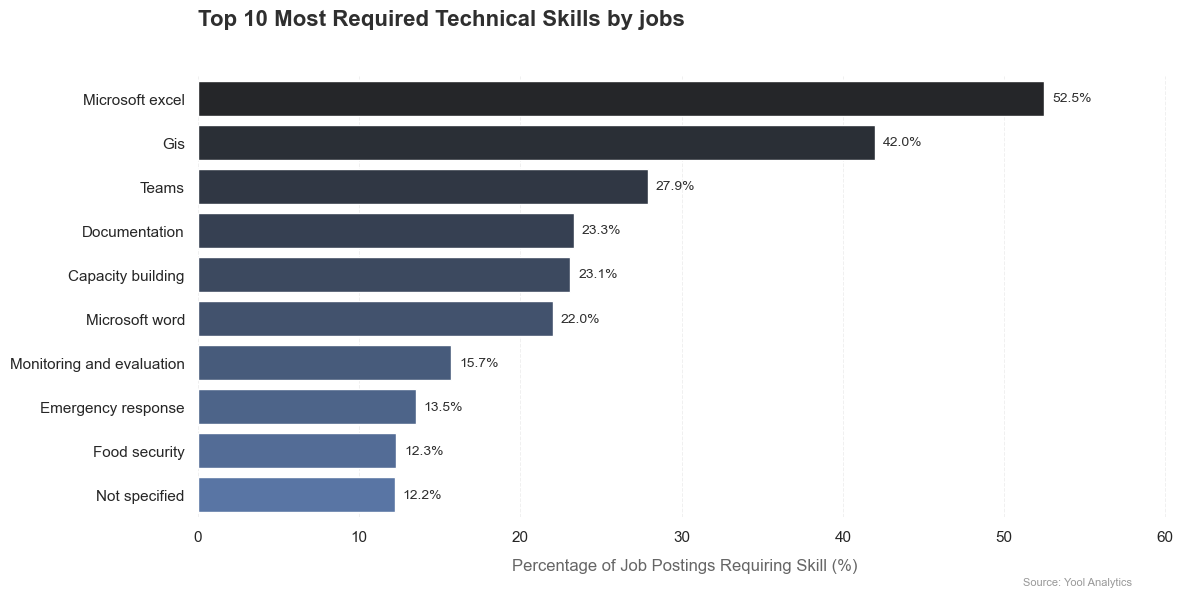

In [161]:
# 1. Most Commonly Required Technical Skills
# Splitting skills into a list and counting occurrences
technical_skills_series = df_filtered['technical_skills'].dropna().str.split(',').explode().str.strip()
technical_skills_counts = technical_skills_series.value_counts().head(10)

# Calculate percentages
total_jobs_tech = len(df_filtered)
tech_skills_percent = (technical_skills_counts / total_jobs_tech * 100).round(1)

# Set up styling
plt.rcParams['font.family'] = 'Poppins'
sns.set_theme(style='ticks')
palette = sns.color_palette("dark:b", n_colors=10)  # Darkest at top

# Create figure
fig, ax = plt.subplots(figsize=(12, 6))
plt.subplots_adjust(top=0.85)

# Create horizontal bar plot
sns.barplot(x=tech_skills_percent.values, 
            y=tech_skills_percent.index,
            palette=palette,
            ax=ax)

# Title formatting
plt.title('Top 10 Most Required Technical Skills by jobs\n', 
          loc='left', 
          fontsize=16, 
          fontweight='semibold', 
          color='#2F2F2F',
          pad=20)

# Percentage labels
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 0.5,  # Tight spacing
            p.get_y() + p.get_height()/2,
            f'{width:.1f}%',
            ha='left', 
            va='center',
            fontsize=10,
            color='#2F2F2F')

# Axis cleanup
ax.set_xlabel('Percentage of Job Postings Requiring Skill (%)', 
              labelpad=10, 
              fontsize=12, 
              color='#666666')
ax.set_ylabel('')
ax.set_xlim(0, tech_skills_percent.max() * 1.15)

# Remove clutter
sns.despine(left=True, bottom=True)
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Light gridlines
ax.xaxis.grid(True, 
              color='#F0F0F0', 
              linestyle='--', 
              linewidth=0.7)

# Source annotation
fig.text(0.95, 0.01, 'Source: Yool Analytics', 
         ha='right', 
         color='#999999',
         fontsize=8)

plt.tight_layout()
plt.show()

- What **soft skills** are most valued across industries?

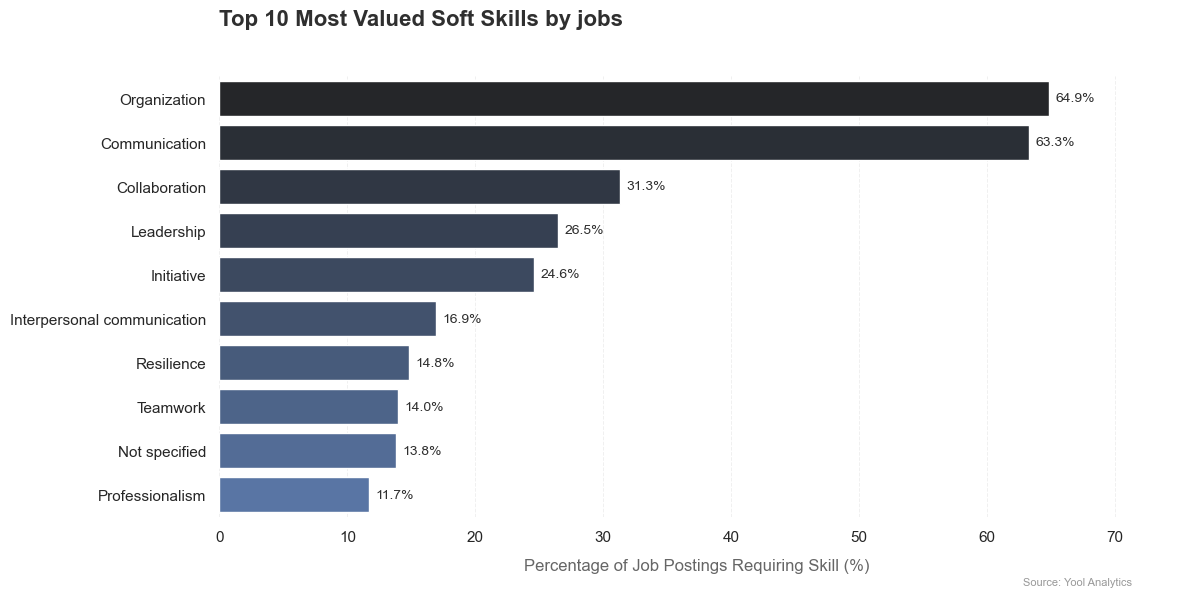

In [160]:
# 2. Most Valued Soft Skills
soft_skills_series = df_filtered['soft_skills'].dropna().str.split(',').explode().str.strip()
soft_skills_counts = soft_skills_series.value_counts().head(10)

# Calculate percentages
total_jobs_soft = len(df_filtered)
soft_skills_percent = (soft_skills_counts / total_jobs_soft * 100).round(1)

# Set up styling
plt.rcParams['font.family'] = 'Poppins'
sns.set_theme(style='ticks')
palette = sns.color_palette("dark:b", n_colors=10)  # Darkest at top

# Create figure
fig, ax = plt.subplots(figsize=(12, 6))
plt.subplots_adjust(top=0.85)

# Create horizontal bar plot
sns.barplot(x=soft_skills_percent.values, 
            y=soft_skills_percent.index,
            palette=palette,
            ax=ax)

# Title formatting
plt.title('Top 10 Most Valued Soft Skills by jobs\n', 
          loc='left', 
          fontsize=16, 
          fontweight='semibold', 
          color='#2F2F2F',
          pad=20)

# Percentage labels
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 0.5,  # Tight spacing
            p.get_y() + p.get_height()/2,
            f'{width:.1f}%',
            ha='left', 
            va='center',
            fontsize=10,
            color='#2F2F2F')

# Axis cleanup
ax.set_xlabel('Percentage of Job Postings Requiring Skill (%)', 
              labelpad=10, 
              fontsize=12, 
              color='#666666')
ax.set_ylabel('')
ax.set_xlim(0, soft_skills_percent.max() * 1.15)

# Remove clutter
sns.despine(left=True, bottom=True)
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Light gridlines
ax.xaxis.grid(True, 
              color='#F0F0F0', 
              linestyle='--', 
              linewidth=0.7)

# Source annotation
fig.text(0.95, 0.01, 'Source: Yool Analytics', 
         ha='right', 
         color='#999999',
         fontsize=8)

plt.tight_layout()
plt.show()

- What are the **most required education levels and fields of study**?

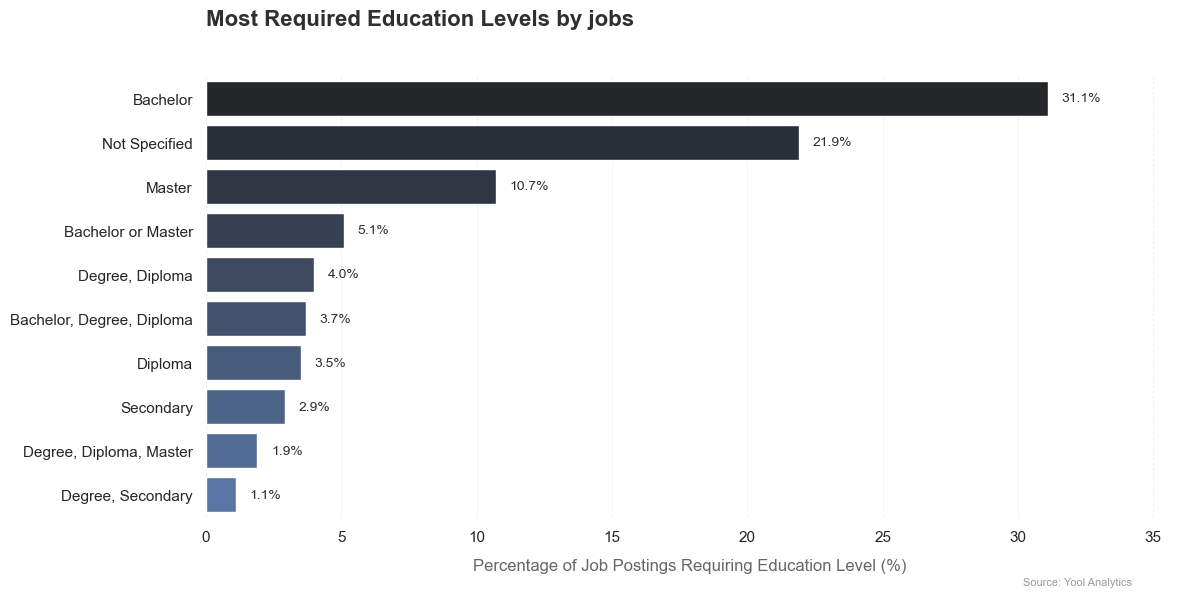

In [159]:
# 3. Most Required Education Levels
education_counts = df_filtered['education_level'].value_counts().head(10)

# Calculate percentages
total_jobs_edu = len(df_filtered)
education_percent = (education_counts / total_jobs_edu * 100).round(1)

# Set up styling
plt.rcParams['font.family'] = 'Poppins'
sns.set_theme(style='ticks')
palette = sns.color_palette("dark:b", n_colors=len(education_counts))

# Create figure
fig, ax = plt.subplots(figsize=(12, 6))
plt.subplots_adjust(top=0.85)

# Create horizontal bar plot
sns.barplot(x=education_percent.values, 
            y=education_percent.index,
            palette=palette,
            ax=ax)

# Title formatting
plt.title('Most Required Education Levels by jobs\n', 
          loc='left', 
          fontsize=16, 
          fontweight='semibold', 
          color='#2F2F2F',
          pad=20)

# Percentage labels
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 0.5,  # Tight spacing
            p.get_y() + p.get_height()/2,
            f'{width:.1f}%',
            ha='left', 
            va='center',
            fontsize=10,
            color='#2F2F2F')

# Axis cleanup
ax.set_xlabel('Percentage of Job Postings Requiring Education Level (%)', 
              labelpad=10, 
              fontsize=12, 
              color='#666666')
ax.set_ylabel('')
ax.set_xlim(0, education_percent.max() * 1.15)

# Remove clutter
sns.despine(left=True, bottom=True)
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Light gridlines
ax.xaxis.grid(True, 
              color='#F0F0F0', 
              linestyle='--', 
              linewidth=0.7)

# Source annotation
fig.text(0.95, 0.01, 'Source: Yool Analytics', 
         ha='right', 
         color='#999999',
         fontsize=8)

plt.tight_layout()
plt.show()

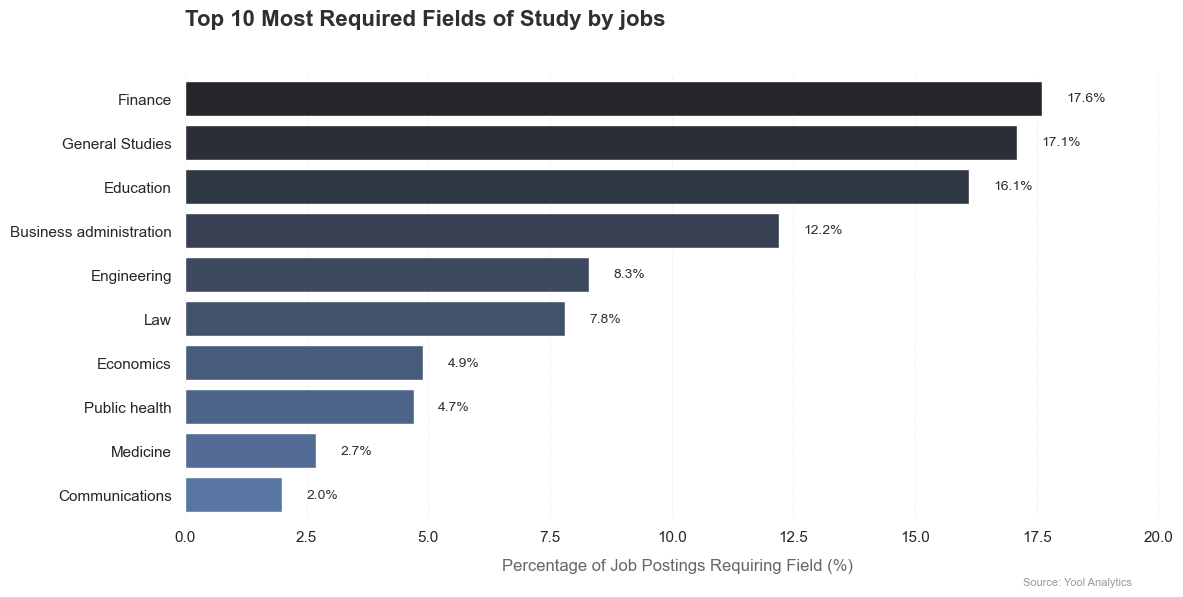

In [155]:
# 4. Most Required Fields of Study
education_field_counts = df_filtered['Education_Field'].value_counts().head(10)

# Calculate percentages
total_jobs_edu_field = len(df_filtered)
edu_field_percent = (education_field_counts / total_jobs_edu_field * 100).round(1)

# Set up styling
plt.rcParams['font.family'] = 'Poppins'
sns.set_theme(style='ticks')
palette = sns.color_palette("dark:b", n_colors=10)  # Darkest at top

# Create figure
fig, ax = plt.subplots(figsize=(12, 6))
plt.subplots_adjust(top=0.85)

# Create horizontal bar plot
sns.barplot(x=edu_field_percent.values, 
            y=edu_field_percent.index,
            palette=palette,
            ax=ax)

# Title formatting
plt.title('Top 10 Most Required Fields of Study by jobs\n', 
          loc='left', 
          fontsize=16, 
          fontweight='semibold', 
          color='#2F2F2F',
          pad=20)

# Percentage labels
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 0.5,  # Tight spacing
            p.get_y() + p.get_height()/2,
            f'{width:.1f}%',
            ha='left', 
            va='center',
            fontsize=10,
            color='#2F2F2F')

# Axis cleanup
ax.set_xlabel('Percentage of Job Postings Requiring Field (%)', 
              labelpad=10, 
              fontsize=12, 
              color='#666666')
ax.set_ylabel('')
ax.set_xlim(0, edu_field_percent.max() * 1.15)

# Remove clutter
sns.despine(left=True, bottom=True)
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Light gridlines
ax.xaxis.grid(True, 
              color='#F0F0F0', 
              linestyle='--', 
              linewidth=0.7)

# Source annotation
fig.text(0.95, 0.01, 'Source: Yool Analytics', 
         ha='right', 
         color='#999999',
         fontsize=8)

plt.tight_layout()
plt.show()

### **4. Work Experience Requirements**
- What is the **experience level distribution** across job categories?

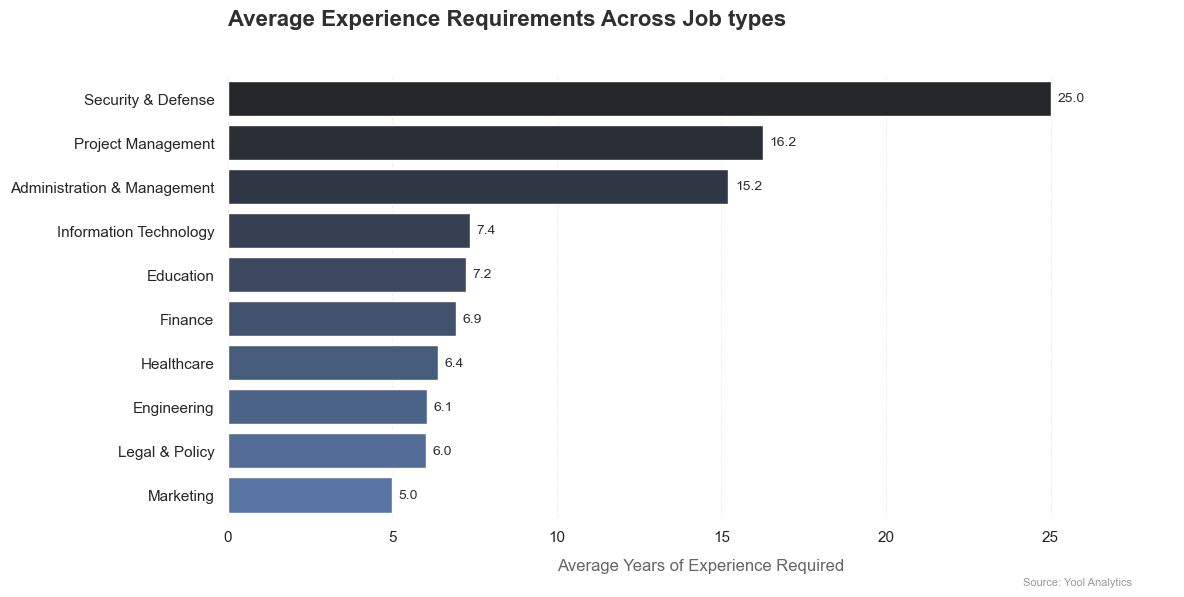

In [174]:
# Convert experience column to numeric values where possible
df_filtered['Experience'] = pd.to_numeric(df_filtered['Experience'], errors='coerce')

# 1. Experience Level Distribution Across Job Categories
experience_by_category = df_filtered.groupby("job_category")["Experience"].median().sort_values()

# Sort experience by category in descending order
experience_by_category_sorted = experience_by_category.sort_values(ascending=False)

# Convert and calculate experience data
df_filtered['Experience'] = pd.to_numeric(df_filtered['Experience'], errors='coerce')
experience_by_category = df_filtered.groupby("job_category")["Experience"].mean().sort_values(ascending=False)
experience_by_category = experience_by_category.head(10)
# Set up styling
plt.rcParams['font.family'] = 'Poppins'
sns.set_theme(style='ticks')
palette = sns.color_palette("dark:b_r", n_colors=len(experience_by_category))  # Reverse gradient

# Create figure
fig, ax = plt.subplots(figsize=(12, 6))
plt.subplots_adjust(top=0.85)

# Create horizontal bar plot
sns.barplot(x=experience_by_category.values, 
            y=experience_by_category.index,
            palette=palette,
            hue=experience_by_category,
            legend=False,
            ax=ax)

# Title formatting
plt.title('Average Experience Requirements Across Job types\n', 
          loc='left', 
          fontsize=16, 
          fontweight='semibold', 
          color='#2F2F2F',
          pad=20)

# Data labels
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 0.2,  # Tight spacing for years
            p.get_y() + p.get_height()/2,
            f'{width:.1f}',
            ha='left', 
            va='center',
            fontsize=10,
            color='#2F2F2F')

# Axis cleanup
ax.set_xlabel('Average Years of Experience Required', 
              labelpad=10, 
              fontsize=12, 
              color='#666666')
ax.set_ylabel('')
ax.set_xlim(0, experience_by_category.max() * 1.15)

# Remove clutter
sns.despine(left=True, bottom=True)
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Light gridlines
ax.xaxis.grid(True, 
              color='#F0F0F0', 
              linestyle='--', 
              linewidth=0.7)

# Source annotation
fig.text(0.95, 0.01, 'Source: Yool Analytics', 
         ha='right', 
         color='#999999',
         fontsize=8)

plt.tight_layout()
plt.show()


### **5. Application Timing & Hiring Cycles**

- What are the **peak months** for job postings?

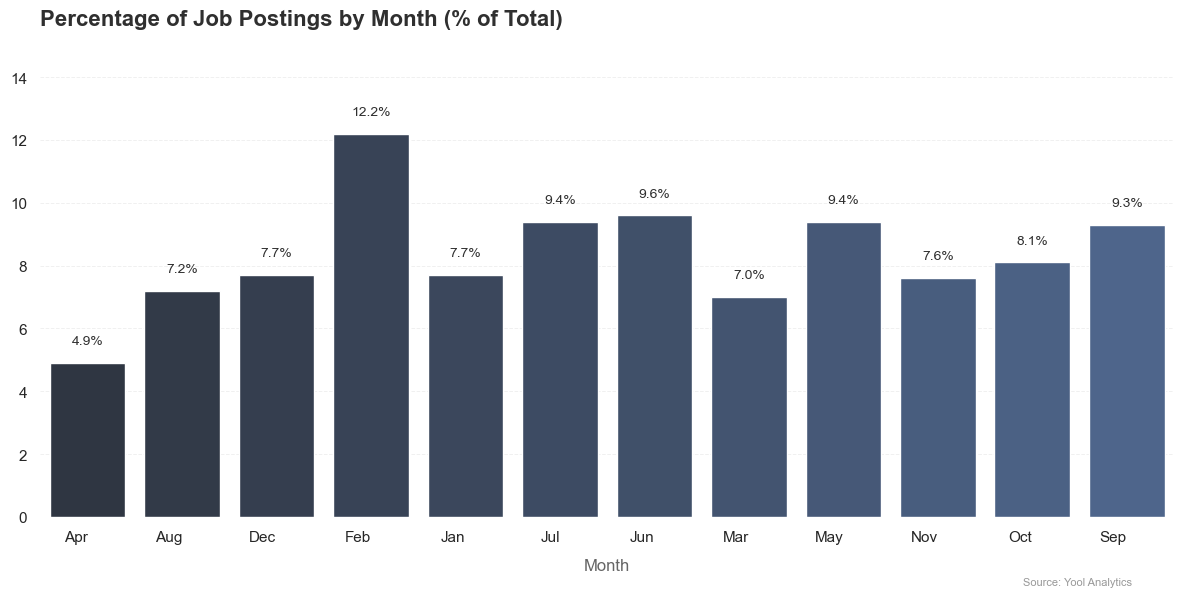

In [157]:
# Convert 'extracted_deadline' to datetime format
df_filtered['extracted_deadline'] = pd.to_datetime(df_filtered['extracted_deadline'], errors='coerce')
# Calculate the number of days job postings are open
df_filtered['days_open'] = (df_filtered['extracted_deadline'] - df_filtered['posted']).dt.days
# 1. Peak Months for Job Postings
monthly_posting_counts = df_filtered['posted_month_short'].value_counts().sort_index()

# Calculate percentages
total_postings = len(df_filtered)
monthly_posting_percent = (monthly_posting_counts / total_postings * 100).round(1)

# Set up styling
plt.rcParams['font.family'] = 'Poppins'
sns.set_theme(style='ticks')
palette = sns.color_palette("dark:b", as_cmap=True)

# Create figure
fig, ax = plt.subplots(figsize=(12, 6))
plt.subplots_adjust(top=0.85)

# Create vertical bar plot with sequential coloring
bar_plot = sns.barplot(x=monthly_posting_percent.index, 
                       y=monthly_posting_percent.values, 
                       palette=palette(np.linspace(0.2, 0.8, 12)),
                       ax=ax)

# Title formatting
plt.title('Percentage of Job Postings by Month (% of Total)\n', 
          loc='left', 
          fontsize=16, 
          fontweight='semibold', 
          color='#2F2F2F',
          pad=20)

# Percentage labels
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 0.5,  # Smaller offset for percentages
            f'{height:.1f}%',
            ha='center', 
            va='bottom',
            fontsize=10,
            color='#2F2F2F')

# Axis cleanup
ax.set_xlabel('Month', 
              labelpad=10, 
              fontsize=12, 
              color='#666666')
ax.set_ylabel('')
ax.set_ylim(0, monthly_posting_percent.max() * 1.15)
plt.xticks(rotation=0, ha='right')

# Remove clutter
sns.despine(left=True, bottom=True)
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Light gridlines
ax.yaxis.grid(True, 
              color='#F0F0F0', 
              linestyle='--', 
              linewidth=0.7)

# Source annotation
fig.text(0.95, 0.01, 'Source: Yool Analytics', 
         ha='right', 
         color='#999999',
         fontsize=8)

plt.tight_layout()
plt.show()